### 대학원 합격 예측 프로젝트
- keras로 딥러닝 모델 만들기
- 대학원 합격/불합격 여부


In [ ]:
# numpy, pandas, matplotlib
# 기본 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_path = '/content/drive/MyDrive/[스마트인재개발원 목포]딥러닝/data/gpascore.csv'
data = pd.read_csv(data_path)
data

,admit,gre,gpa,rank
0,0,380.0,3.21,3
1,1,660.0,3.67,3
2,1,800.0,4.00,1
3,1,640.0,3.19,4
4,0,520.0,2.33,4
...,...,...,...,...
421,1,750.0,3.44,4
422,1,710.0,3.66,4
423,0,450.0,3.25,4
424,1,760.0,3.76,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   426 non-null    int64  
 1   gre     425 non-null    float64
 2   gpa     426 non-null    float64
 3   rank    426 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 13.4 KB


In [ ]:
# null값 있는 데이터 총 합계구하기
data.isnull().sum()

admit    0
gre      1
gpa      0
rank     0
dtype: int64

In [ ]:
# Nan/빈값있는 행을 제거해줌
data = data.dropna()
data.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [ ]:
data.columns

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')

In [ ]:
X = data[['gre', 'gpa', 'rank']]
y = data['admit']

In [ ]:
print(X.shape,y.shape)

(425, 3) (425,)


In [ ]:
X.head()

,gre,gpa,rank
0,380.0,3.21,3
1,660.0,3.67,3
2,800.0,4.00,1
3,640.0,3.19,4
4,520.0,2.33,4


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: admit, dtype: int64

In [ ]:
X1 = data.iloc[:,1:]
y1 = data.iloc[:,0]

In [ ]:
X1.columns

Index(['gre', 'gpa', 'rank'], dtype='object')

In [ ]:
# train,test set split (8:2)
from sklearn.model_selection import train_test_split
# train_test_split(문제,답지,분리비율(test_size), 랜덤규칙고정값설정)
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size = 0.2,
    random_state= 42
)


In [ ]:
# 데이터 크기 확인 shape()
print('X_train 문제 ', X_train.shape)
print('X_test 문제', X_test.shape)
print('y_train 답지', y_train.shape)
print('y_test 답지', y_test.shape)

X_train 문제  (340, 3)
X_test 문제 (85, 3)
y_train 답지 (340,)
y_test 답지 (85,)


### 딥러닝 모델 디자인하기
- MLP

In [ ]:
# tensorflow 도구 불러오기
from tensorflow.keras.models import Sequential # 뼈대 생성
from tensorflow.keras.layers import InputLayer, Dense, Activation

In [ ]:
# 1. 신경망 구조 설계
# 뼈대 생성
model = Sequential()
# 입력층
model.add(InputLayer(input_shape=(3,)))
# 입력데이터의 형태를 결정 / 입력 특성의 개수를 입력

# Activation 함수는 여러가지 [sigmoid,tanh,relu,leakyrelu]
# 중간층(은닉층, 히든레이어)
# model.add(Dense(units=32),Activation='relu') # 뉴련(선형모델) 32개 연결
# model.add(Dense(32),Activation='relu') # 뉴련(선형모델) 32개 연결
model.add(Dense(units=32)) # 뉴련(선형모델) 32개 연결
model.add(Activation('relu')) # 활성화 함수
model.add(Dense(units=64)) # 뉴련(선형모델) 64개 연결
model.add(Activation('relu')) # 활성화 함수
model.add(Dense(units=128)) # 뉴련(선형모델) 128개 연결
model.add(Activation('relu')) # 활성화 함수
model.add(Dense(units=256)) # 뉴련(선형모델) 256개 연결
model.add(Activation('relu')) # 활성화 함수
# 출력층
model.add(Dense(units=1)) #레이어1개 출력층
model.add(Activation('sigmoid')) # 활성화 함수
# 성적데이터 : 연속형(시퀀셜)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               3

### compile
- optimizer:경사하강법으로 w(가중치)값 수정
- 종류:adam,adagrad,rsmprop,sgd,,,.....
- loss(손실함수):mse(선형)
- binary_crossentropy:2진분류나 확률 문제
- metrics = 어던 요소로 평가할지(loss, acc)

In [ ]:
###
model.compile(
    #loss='mse',
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc'] # 정확도 평가지표 acc,accuracy
)

### 모델 학습


In [ ]:
# model.fit
h = model.fit(X,y,epochs=1000)

Epoch 1/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5360 - acc: 0.7247
Epoch 2/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5390 - acc: 0.7318
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5202 - acc: 0.7459
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5377 - acc: 0.7318
Epoch 5/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5611 - acc: 0.7082
Epoch 6/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5399 - acc: 0.7176
Epoch 7/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5340 - acc: 0.7341
Epoch 8/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5237 - acc: 0.7459
Epoch 9/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5247 - acc: 0.7388
Epoch 10/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.5193 - acc: 0.7553
Epoch 11/1000
14/14 [============================

In [ ]:
# Epoch 1/500
# 14/14 [==============================] - 0s 2ms/step - loss: 0.6264 - acc: 0.6565
# Epoch 500/500
# 14/14 [==============================] - 0s 4ms/step - loss: 0.5874 - acc: 0.7035
# Epoch 1000/1000
# 14/14 [==============================] - 0s 5ms/step - loss: 0.4613 - acc: 0.8071

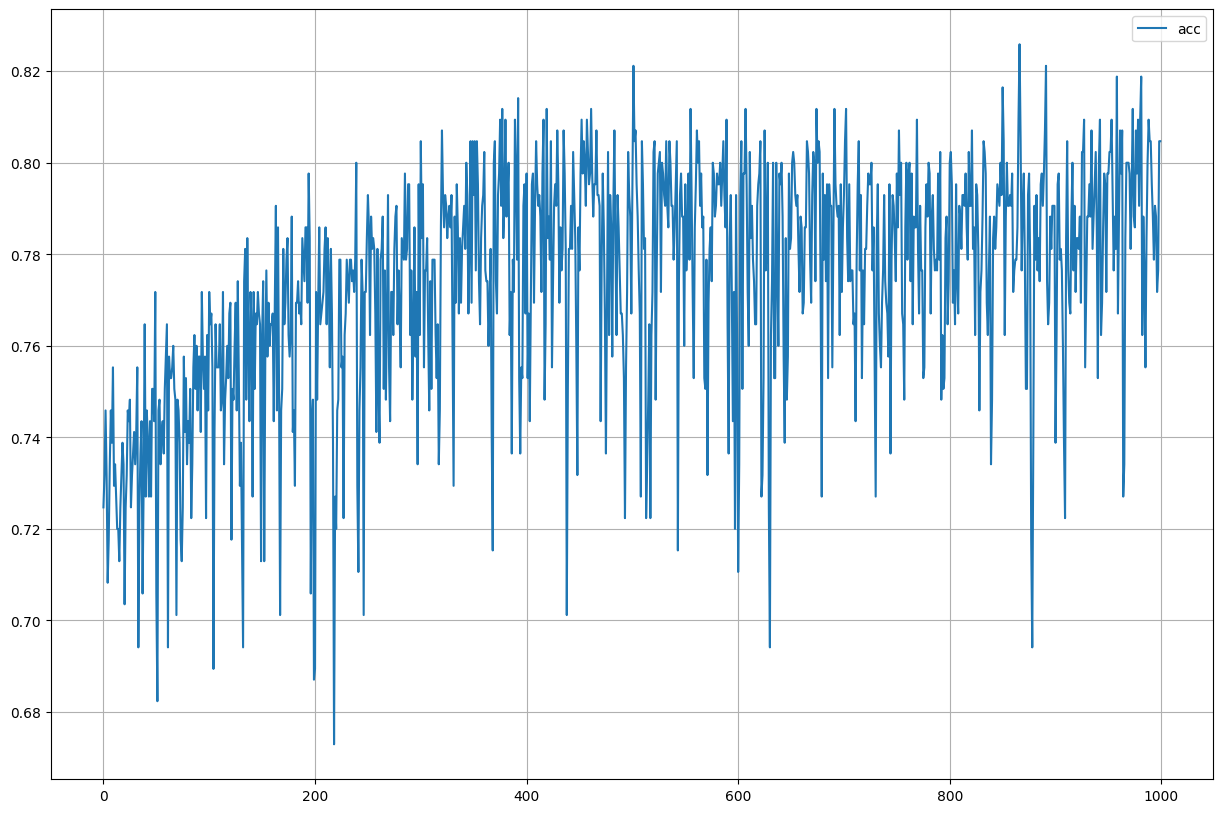

In [ ]:
# 학습결과 시각화
# figsize 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(h.history['acc'], label='acc')
plt.grid() # 격자무늬
plt.legend() # 범례

### 학습시킨 모델 예측하기


In [ ]:
X.iloc[0]

gre     380.00
gpa       3.21
rank      3.00
Name: 0, dtype: float64

In [ ]:
y.iloc[0]

0

In [ ]:
X_test.iloc[0]

gre     650.00
gpa       3.44
rank      2.00
Name: 418, dtype: float64

In [ ]:
y_test.iloc[0]

0

In [ ]:
pre = model.predict(X_test)
pre

3/3 [==============================] - 0s 4ms/step


array([[0.80910456],
       [0.5631056 ],
       [0.75657856],
       [0.89124566],
       [0.79469204],
       [0.15734178],
       [0.24039675],
       [0.8631692 ],
       [0.9091767 ],
       [0.8383982 ],
       [0.4799155 ],
       [0.05382664],
       [0.78562254],
       [0.96948886],
       [0.10934417],
       [0.92076707],
       [0.14238997],
       [0.47253963],
       [0.94986725],
       [0.45335016],
       [0.8345154 ],
       [0.39563444],
       [0.9502608 ],
       [0.42245138],
       [0.8889173 ],
       [0.73212445],
       [0.372439  ],
       [0.12944832],
       [0.17386292],
       [0.92011076],
       [0.9472896 ],
       [0.1480356 ],
       [0.7047966 ],
       [0.82208294],
       [0.906286  ],
       [0.29857987],
       [0.8162802 ],
       [0.04139901],
       [0.8348774 ],
       [0.92264223],
       [0.7259157 ],
       [0.85776484],
       [0.9624788 ],
       [0.8877036 ],
       [0.09335139],
       [0.9226261 ],
       [0.367237  ],
       [0.980

In [ ]:
type(pre)

numpy.ndarray

In [ ]:
pre[0]

array([0.80910456], dtype=float32)

In [ ]:
predict = model.predict([[400,3.7,1]])
print(predict)

if predict > 0.5:
  print('합격')
else:
  print('불합격')

1/1 [==============================] - 0s 108ms/step
[[0.19423883]]
불합격


In [ ]:
# model2